<a href="https://colab.research.google.com/github/pgiambuzzi/INF502/blob/main/extra_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extra Homework Assignment - 11/10 

Perry Giambuzzi - [GitHub](https://github.com/pgiambuzzi/INF502)

In [2]:
# Importing modules that will allow us to scrape data from a webpage and plot that data later on.
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [3]:
# Scrapping data from the counrty-population Wiki page
result = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density")

# Laying out the html tags so we can identify which tags the data we need lie under.
content = result.content
soup = BeautifulSoup(content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of countries and dependencies by population density - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"ff0f334b-4834-44be-adbd-6f3e2ef6773b","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_and_dependencies_by_population_density","wgTitle":"List of countries and dependencies by population density","wgCurRevisionId":1119626288,"wgRevisionId":1119626288,"wgArticleId":79370,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles

In [4]:
# Reading the first table from the webpage into a pandas datafrane
tables = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density')
main_table = tables[0]
main_table = main_table.drop(main_table.index[[156, 161]])
main_table

Country / Territory Population     Area              Density  \
                 Country / Territory Population      km2       sqmi      /km2   
0                      Macau (China)     686607       33      13.00  20806.00   
1                             Monaco      36686        2       1.00  18343.00   
2                          Singapore    5453600      716     276.00   7617.00   
3                  Hong Kong (China)    7494578     1104     426.00   6789.00   
4                    Gibraltar (BOT)      32669        6       2.00   5445.00   
..                               ...        ...      ...        ...       ...   
245                         Mongolia    3347782  1564116  603905.00      2.00   
246         Western Sahara [note 14]     565581   266000  102703.00      2.00   
247           Falkland Islands (BOT)       3764    12173    4700.00      0.30   
248  Svalbard and Jan Mayen (Norway)       2939    62422   24101.13      0.05   
249              Greenland (Denmark)      56243  2166086  836325.80      0.03   

                  Source& Date  
        /sqmi     Source& Date  
0    53888.00             2021  
1    47508.00             2021  
2    19727.00             2021  
3    17582.00             2021  
4    14102.00             2021  
..        ...              ...  
245      6.00             2021  
246      6.00             2021  
247      0.80             2021  
248      0.12  [34] 1 Sep 2012  
249      0.07             2021  

[248 rows x 7 columns]

In [5]:
# Selecting only the columns we want
df = pd.DataFrame(main_table)
df = df[["Country / Territory", "Population", "Area"]]
df.head

<bound method NDFrame.head of                  Country / Territory Population     Area           
                 Country / Territory Population      km2       sqmi
0                      Macau (China)     686607       33      13.00
1                             Monaco      36686        2       1.00
2                          Singapore    5453600      716     276.00
3                  Hong Kong (China)    7494578     1104     426.00
4                    Gibraltar (BOT)      32669        6       2.00
..                               ...        ...      ...        ...
245                         Mongolia    3347782  1564116  603905.00
246         Western Sahara [note 14]     565581   266000  102703.00
247           Falkland Islands (BOT)       3764    12173    4700.00
248  Svalbard and Jan Mayen (Norway)       2939    62422   24101.13
249              Greenland (Denmark)      56243  2166086  836325.80

[248 rows x 4 columns]>

In [8]:
# Summarizing the dataframe
df.describe()

Population          Area              
         Population           km2          sqmi
count  2.480000e+02  2.480000e+02  2.480000e+02
mean   3.189263e+07  5.456364e+05  2.106702e+05
std    1.325428e+08  1.700353e+06  6.565065e+05
min    4.700000e+01  0.000000e+00  0.000000e+00
25%    3.130185e+05  1.533250e+03  5.920000e+02
50%    5.058126e+06  6.493100e+04  2.506950e+04
75%    1.959232e+07  3.623352e+05  1.398980e+05
max    1.425893e+09  1.709825e+07  6.601633e+06

In [9]:
# Finding the correlation between a country's area and population size
df.corr()

Population      Area          
                      Population       km2      sqmi
Population Population   1.000000  0.459275  0.459275
Area       km2          0.459275  1.000000  1.000000
           sqmi         0.459275  1.000000  1.000000

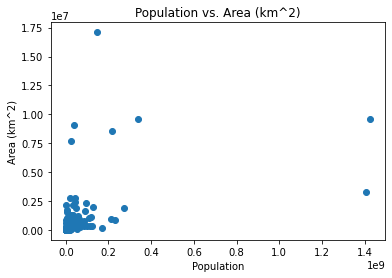

In [11]:
# Creating a scatter plot of population vs area in square kilometers for each country
# Note the 1e7 multiplier for y values and 1e9 multiplier for x values.
x= df.iloc[:,1]; y = df.iloc[:,2]
plt.scatter(x,y)
plt.title("Population vs. Area (km^2)")
plt.xlabel("Population")
plt.ylabel("Area (km^2)")
plt.show()